In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv(r'C:\Users\lilie\OneDrive\Bureau\ironHack\dataset\fake_real_final.csv')
df.head()

,title,text,label_REAL,subject,date
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,NaN,NaN
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,NaN,NaN
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,NaN,NaN
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,NaN,NaN
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,NaN,NaN


In [8]:
df.label_REAL.value_counts(normalize=True)

0    0.522208
1    0.477792
Name: label_REAL, dtype: float64

No handles with labels found to put in legend.


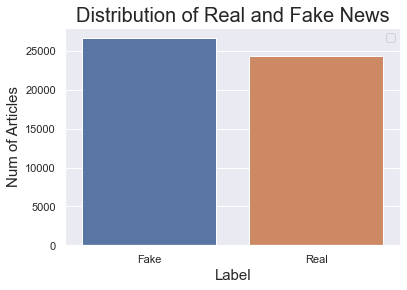

In [82]:
sns.set(style="darkgrid")

fig, ax = plt.subplots()

#clrs = ['red' if x==0 else 'blue' for x in df.Label_REAL]
sns.countplot(df.label_REAL)
plt.title("Distribution of Real and Fake News", fontsize=20)
plt.legend()

ax.set_xticklabels(['Fake','Real'])
plt.xlabel('Label', fontsize=15)
plt.ylabel('Num of Articles', fontsize=15)

plt.show()

In [5]:
df['txt'] = df['title'] + " " + df['text']
df = df.drop(columns = ['title', 'text','subject','date'])
df = df.loc[~df['txt'].isna()]
df.head()

,label_REAL,txt
0,0,You Can Smell Hillary’s Fear Daniel Greenfield...
1,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,1,Kerry to go to Paris in gesture of sympathy U....
3,0,Bernie supporters on Twitter erupt in anger ag...
4,1,The Battle of New York: Why This Primary Matte...


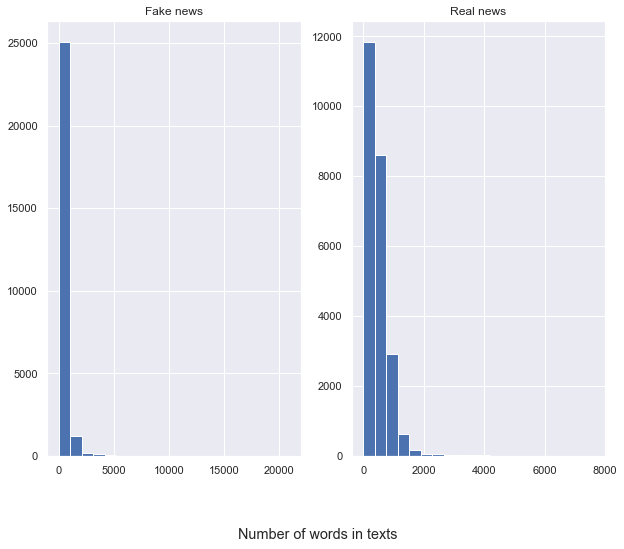

In [250]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,8))

text_len = df[df.label_REAL==0]['txt'].str.split().map(lambda x: len(x))
ax1.hist(text_len, bins = 20)
ax1.set_title('Fake news')

text_len = df[df.label_REAL==1]['txt'].str.split().map(lambda x: len(x))
ax2.hist(text_len, bins = 20)
ax2.set_title('Real news')

fig.suptitle('Number of words in texts', y=0)
fig.show()

No handles with labels found to put in legend.


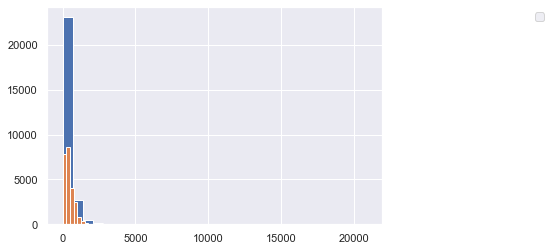

In [62]:
df[df.label_REAL==0]['txt'].str.split().map(lambda x: len(x)).hist(bins=30) #blue
df[df.label_REAL==1]['txt'].str.split().map(lambda x: len(x)).hist(bins=30) #orange

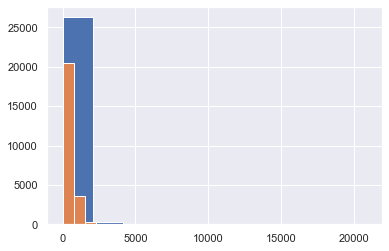

In [46]:
#other method, without bins
seq_len_fake = [len(i.split()) for i in df[df.label_REAL==0]['txt']]
seq_len_real = [len(i.split()) for i in df[df.label_REAL==1]['txt']]
pd.Series(seq_len_fake).hist() #blue
pd.Series(seq_len_real).hist() #real

plt.legend(loc='upper right',bbox_to_anchor=(1.5,1))

# Split train-test

In [6]:
X = df.txt
y = df.label_REAL

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# Preprocessing - 1st approach (tfidf)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
### tf-idf
tfidf_vectorizer = TfidfVectorizer(strip_accents=ascii, stop_words='english', max_df=0.7)

X_tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
X_tfidf_test = tfidf_vectorizer.transform(X_test)

NameError: name 'X_train' is not defined

# Preprocessing - 2nd approach (tfidf n-grams=1,3)

In [8]:
### tf-idf with n-grams
tfidf_vectorizer2 = TfidfVectorizer(ngram_range=(1, 3),stop_words='english', max_df=0.7)

X_tfidf_train2 = tfidf_vectorizer.fit_transform(X_train) 
X_tfidf_test2 = tfidf_vectorizer.transform(X_test)

# Modelling

## passiveAggressive 

In [14]:
from sklearn.linear_model import PassiveAggressiveClassifier

### 1. tf-idf

In [19]:
clf = PassiveAggressiveClassifier(n_iter_no_change=100)
clf.fit(X_tfidf_train, y_train)
y_pred = clf.predict(X_tfidf_test)

cm = confusion_matrix(y_test, y_pred)
display(cm)
print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

array([[7823,  165],
       [ 172, 7139]], dtype=int64)

Accuracy is 0.978
Precision is 0.9774
Recall is 0.9765
F1 is 0.9769


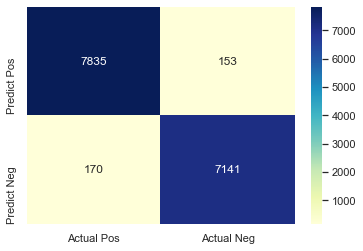

In [17]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Pos', 'Actual Neg'], 
                                 index=['Predict Pos', 'Predict Neg'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### 2. tf-idf n-grams 

In [259]:
clf = PassiveAggressiveClassifier(n_iter_no_change=50)
clf.fit(X_tfidf_train2, y_train)
y_pred2 = clf.predict(X_tfidf_test2)

display(cm)
print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

array([[7337,  651],
       [ 792, 6519]], dtype=int64)

Accuracy is 0.9722
Precision is 0.9755
Recall is 0.9659
F1 is 0.9707


## Decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

### 1. tf-idf

In [260]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_tfidf_train, y_train)
y_pred=dtc.predict(X_tfidf_test)

print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

Accuracy is 0.951
Precision is 0.9573
Recall is 0.9393
F1 is 0.9482


### 2. tf-idf n-grams

In [261]:
dtc.fit(X_tfidf_train2, y_train)
y_pred2=dtc.predict(X_tfidf_test2)

print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

Accuracy is 0.951
Precision is 0.9573
Recall is 0.9393
F1 is 0.9482


## Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB

### 1. tf-idf

In [262]:
classifier=MultinomialNB()
classifier.fit(X_tfidf_train, y_train)
y_pred = classifier.predict(X_tfidf_test)

print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

Accuracy is 0.9057
Precision is 0.9092
Recall is 0.8917
F1 is 0.9004


### 2. tf-idf n-grams

In [263]:
classifier=MultinomialNB()
classifier.fit(X_tfidf_train2, y_train)
y_pred2 = classifier.predict(X_tfidf_test2)

print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

Accuracy is 0.9057
Precision is 0.9092
Recall is 0.8917
F1 is 0.9004


## random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier()
rf.fit(X_tfidf_train,y_train)
y_pred = rf.predict(X_tfidf_test)

print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

Accuracy is 0.9645
Precision is 0.9717
Recall is 0.9535
F1 is 0.9625


# SVM (too long)

In [21]:
from sklearn.svm import SVC

In [ ]:
SVM = SVC(kernel = 'linear')
SVMClassifier = SVM.fit(X_tfidf_train, y_train)
y_pred = SVMClassifier.predict(X_tfidf_test)

print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

# SGD Classifier

In [23]:
from sklearn.linear_model import SGDClassifier

In [24]:
SGD = SGDClassifier(loss = 'modified_huber')
SGDC = SGD.fit(X_tfidf_train, y_train)
y_pred = SGDC.predict(X_tfidf_test)

In [25]:
print('Accuracy is', accuracy_score(y_test, y_pred).round(4))
print('Precision is', precision_score(y_test, y_pred).round(4))
print('Recall is', recall_score(y_test, y_pred).round(4))
print('F1 is', f1_score(y_test, y_pred).round(4))

Accuracy is 0.9759
Precision is 0.9763
Recall is 0.9733
F1 is 0.9748


## TFIDF and PassiveAggressive classifier features selection

In [22]:
tfidf_vectorizer = TfidfVectorizer(strip_accents=ascii, stop_words='english', max_df=0.7)
X_tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
X_tfidf_test = tfidf_vectorizer.transform(X_test)

clf = PassiveAggressiveClassifier(n_iter_no_change=100)
clf.fit(X_tfidf_train, y_train)
y_pred = clf.predict(X_tfidf_test)

display(confusion_matrix(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred).round(4))

array([[7830,  158],
       [ 166, 7145]], dtype=int64)

Precision is 0.9784


In [30]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english')
X_tfidf_train2 = tfidf_vectorizer2.fit_transform(X_train) 
X_tfidf_test2 = tfidf_vectorizer2.transform(X_test)

clf.fit(X_tfidf_train2, y_train)
y_pred2 = clf.predict(X_tfidf_test2)

display(confusion_matrix(y_test, y_pred2))
print('Precision is', precision_score(y_test, y_pred2).round(4))

array([[7805,  183],
       [ 228, 7083]], dtype=int64)

Precision is 0.9748


In [31]:
tfidf_vectorizer3 = TfidfVectorizer(strip_accents=ascii, stop_words='english')
X_tfidf_train3 = tfidf_vectorizer3.fit_transform(X_train) 
X_tfidf_test3 = tfidf_vectorizer3.transform(X_test)

clf.fit(X_tfidf_train3, y_train)
y_pred3 = clf.predict(X_tfidf_test3)

display(confusion_matrix(y_test, y_pred3))
print('Precision is', precision_score(y_test, y_pred3).round(4))

array([[7831,  157],
       [ 168, 7143]], dtype=int64)

Precision is 0.9785


In [33]:
tfidf_vectorizer5 = TfidfVectorizer(strip_accents=ascii, stop_words='english', min_df=0.1, max_df=0.9)
X_tfidf_train5 = tfidf_vectorizer5.fit_transform(X_train) 
X_tfidf_test5 = tfidf_vectorizer5.transform(X_test)

clf.fit(X_tfidf_train5, y_train)
y_pred5 = clf.predict(X_tfidf_test5)

display(confusion_matrix(y_test, y_pred5))
print('Precision is', precision_score(y_test, y_pred5).round(4))

array([[7446,  542],
       [ 390, 6921]], dtype=int64)

Precision is 0.9274


### Best prediction

In [59]:
clf = PassiveAggressiveClassifier(n_iter_no_change=100)
tfidf_vectorizer4 = TfidfVectorizer(strip_accents=ascii, stop_words='english', max_df=0.9)
X_tfidf_train4 = tfidf_vectorizer4.fit_transform(X_train) 
X_tfidf_test4 = tfidf_vectorizer4.transform(X_test)

clf.fit(X_tfidf_train4, y_train)
y_pred4 = clf.predict(X_tfidf_test4)

display(confusion_matrix(y_test, y_pred4))
print('Accuracy is', accuracy_score(y_test, y_pred4).round(4))
print('Precision is', precision_score(y_test, y_pred4).round(4))
print('Recall is', recall_score(y_test, y_pred4).round(4))
print('F1 is', f1_score(y_test, y_pred4).round(4))

array([[7835,  153],
       [ 163, 7148]], dtype=int64)

Accuracy is 0.9793
Precision is 0.979
Recall is 0.9777
F1 is 0.9784


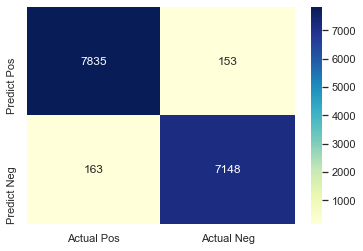

In [60]:
cm = confusion_matrix(y_test, y_pred4)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Pos', 'Actual Neg'], 
                                 index=['Predict Pos', 'Predict Neg'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [55]:
tfidf_items = tfidf_vectorizer4.vocabulary_.items()
list(tfidf_items)[:15]

[('dallas', 30220),
 ('maidan', 66949),
 ('staged', 107263),
 ('snipers', 105469),
 ('designed', 32471),
 ('inflict', 54805),
 ('u2018strategy', 119086),
 ('tension', 111794),
 ('u2019', 119433),
 ('daily', 30160),
 ('shooter', 103505),
 ('21st', 3825),
 ('century', 23293),
 ('wirelast', 135302),
 ('night', 78116)]

# Most important features for Real & Fake

In [17]:
df_real = df.loc[df.label_REAL==1]
df_fake = df.loc[df.label_REAL==0]
df_real.shape

(24365, 2)

In [130]:
dic = tfidf_real.vocabulary_
dic = sorted(dic.items(), key=lambda x:x[1], reverse=False)
sortdict = dict(dic)
print(sortdict)

In [32]:
tfidf_fake = TfidfVectorizer(strip_accents=ascii, stop_words='english', max_df=0.7)
X_tfidf_fake_train = tfidf_fake.fit_transform(X_train) 
X_tfidf_fake_test = tfidf_fake.transform(X_test)

In [18]:
#top 30 fake news
topn_class1=sorted(zip(clf.coef_[0], tfidf_vectorizer4.get_feature_names()))[:10]
for coef, feat in topn_class1:
        print(clf.classes_[0], coef, feat)

0 -8.895581977168096 featured
0 -8.717739454343928 image
0 -8.199266503844072 breaking
0 -7.308251126771576 video
0 -7.15256096100099 read
0 -7.147876847292254 nwearing
0 -5.980972318304913 getty
0 -5.672918636637412 watch
0 -5.447582316840695 nothers
0 -5.442220967940975 hillary


In [19]:
#top 30 real news
topn_class2=sorted(zip(clf.coef_[0], tfidf_vectorizer4.get_feature_names()))[-10:]
for coef, feat in topn_class2:
        print(clf.classes_[1], coef, feat)

1 3.7578891603894453 washington
1 3.774398666439714 monday
1 3.9933094348773013 tuesday
1 4.108487656881986 factbox
1 4.49734690478202 thursday
1 4.59561244310981 xa0the
1 7.052631691355194 nbut
1 7.349453408585424 xa0
1 7.38968890740779 said
1 25.44645006035117 reuters


In [146]:
#top n vectors for fake and real news
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)
        
most_informative_feature_for_binary_classification(tfidf_vectorizer4, clf, n=30)

0 -8.758666841968838 featured
0 -8.582790942878637 image
0 -8.23763629974966 breaking
0 -7.209746417521291 video
0 -7.1929940812639 read
0 -7.081565221704481 nwearing
0 -5.956205996383033 getty
0 -5.745642103493524 watch
0 -5.449278070570245 hillary
0 -5.377934252232653 ipsos
0 -5.30180119751959 nothers
0 -4.870707139664385 u201c
0 -4.6725622894696 com
0 -4.643606017056696 neven
0 -4.471121128948189 october
0 -4.284619452185391 just
0 -4.253637420942676 breitbart
0 -4.160897057460708 pic
0 -4.11141018392776 u2026
0 -4.036556884570469 entire
0 -4.003923143602376 flickr
0 -3.8882005088203417 photo
0 -3.851508061597044 mr
0 -3.839295794195911 wfb
0 -3.802374496667736 2016
0 -3.7472316154173453 nation
0 -3.731594936349467 https
0 -3.707608382136202 statesofthenation
0 -3.5979787987244403 ap
0 -3.5927061530925117 images

1 25.507878117854734 reuters
1 7.408257834416797 said
1 7.152852727363315 xa0
1 6.879067088642821 nbut
1 4.777451158816453 thursday
1 4.498842022114984 xa0the
1 4.320603222

# Predictions on scraped data

In [20]:
df_infowars = pd.read_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\Fake_News\data\df_infowars.csv')
df_reuters = pd.read_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\Fake_News\data\df_reuters.csv')

In [21]:
print(df_infowars.shape)
print(df_reuters.shape)

(113, 2)
(102, 2)


In [22]:
df_infowars['txt'] = df_infowars['title'] + " " + df_infowars['text']
df_infowars = df_infowars.drop(columns = ['title', 'text'])
df_infowars = df_infowars.loc[~df_infowars['txt'].isna()]
df_infowars.head()

,txt
0,Watch Live: New Fauci Emails Contain Damning D...
1,Scientist At Center Of Lab Leak Controversy Pu...
2,Poll: Majority Of Americans Believe COVID Came...
3,German Study Finds Lockdown ‘Had No Effect’ on...
4,50-Year-Old Mother Charged With ‘Transphobic H...


In [23]:
df_reuters['txt'] = df_reuters['title'] + " " + df_reuters['text']
df_reuters = df_reuters.drop(columns = ['title', 'text'])
df_reuters = df_reuters.loc[~df_reuters['txt'].isna()]
df_reuters.head()

,txt
0,Mexican rulers' lower house majority to shrink...
1,China administered total of 777.88 mln doses o...
2,Thailand starts long awaited COVID-19 vaccinat...
3,Afghan schoolgirl determined to return to scho...
4,Swiss to vote on whether to become first Europ...


In [ ]:
del df_infowars['Unnamed: 0']

In [24]:
df_reuters['label_REAL']=1
df_infowars['label_REAL']=0

In [25]:
from sklearn.utils import shuffle
df_scraped =  pd.concat([df_reuters, df_infowars], axis = 0)

df_scraped = shuffle(df_scraped).reset_index(drop=True)
df_scraped.head()

,txt,label_REAL
0,Top Japanese virologist warns of risks of Toky...,1
1,Muslim Neighborhoods in British Towns are ‘No-...,0
2,Milan in the ‘Throes of Total Decay’ as Migran...,0
3,"Resigned to a nuclear deal revival, Gulf engag...",1
4,Wife of 'El Chapo' to plead guilty to helping ...,1


## pred

In [26]:
X_test_scraped = df_scraped.txt
y_test_scraped = df_scraped.label_REAL

In [185]:
X_test_scraped

0      AMC stock soars over 20% as Reddit-fueled rall...
1      Sheriff Leaves Democrat Party Over ‘Relentless...
2      Watch Live: Nobel Prize Winner Warns Covid Inj...
3      China says U.S. senators visiting Taiwan on mi...
4      Thrilled to have you: UAE welcomes American Je...
                             ...                        
209    Stanford Epidemiologist: Fauci’s ‘Credibility ...
210    Three killed in Russian COVID-19 ward blaze, o...
211    ‘Neither legal nor constitutional’: Virginia t...
212    U.S. reunites only seven immigrant children wi...
213    Officials Resign After Censoring Vet’s Memoria...
Name: txt, Length: 214, dtype: object

In [27]:
#pour rappel
#tfidf_vectorizer4 = TfidfVectorizer(strip_accents=ascii, stop_words='english', max_df=0.9)
#X_tfidf_train4 = tfidf_vectorizer4.fit_transform(X_train) 

X_test_scraped_tfidf = tfidf_vectorizer4.transform(X_test_scraped)
#clf.fit(X_tfidf_train4, y_train)

y_pred_scraped = clf.predict(X_test_scraped_tfidf)

display(confusion_matrix(y_test_scraped, y_pred_scraped))
print('Accuracy is', accuracy_score(y_test_scraped, y_pred_scraped).round(4))
print('Precision is', precision_score(y_test_scraped, y_pred_scraped).round(4))
print('Recall is', recall_score(y_test_scraped, y_pred_scraped).round(4))
print('F1 is', f1_score(y_test_scraped, y_pred_scraped).round(4))

array([[74, 38],
       [ 6, 96]], dtype=int64)

Accuracy is 0.7944
Precision is 0.7164
Recall is 0.9412
F1 is 0.8136


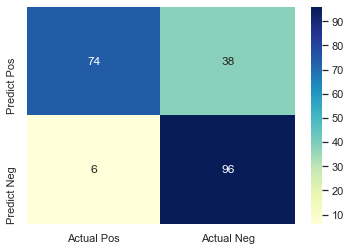

In [28]:
cm = confusion_matrix(y_test_scraped, y_pred_scraped)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Pos', 'Actual Neg'], 
                                 index=['Predict Pos', 'Predict Neg'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [29]:
df_X_test_scraped = pd.DataFrame(X_test_scraped)
df_y_test_scraped = pd.DataFrame(y_test_scraped)
df_y_pred_scraped = pd.DataFrame(y_pred_scraped)

In [30]:
df_X_test_scraped['label'] = df_y_test_scraped
df_X_test_scraped['predictions']= df_y_pred_scraped

In [31]:
df_X_test_scraped

,txt,label,predictions
0,Top Japanese virologist warns of risks of Toky...,1,1
1,Muslim Neighborhoods in British Towns are ‘No-...,0,0
2,Milan in the ‘Throes of Total Decay’ as Migran...,0,0
3,"Resigned to a nuclear deal revival, Gulf engag...",1,1
4,Wife of 'El Chapo' to plead guilty to helping ...,1,1
...,...,...,...
209,Migrants Crossing English Channel in Designer ...,0,0
210,Thousands of nurses go on strike in New Zealan...,1,0
211,England’s Lockdown Could Continue Despite Deat...,0,1
212,German Study Finds Lockdown ‘Had No Effect’ on...,0,1


In [32]:
df_X_test_scraped.to_csv(r'C:\Users\lilie\GitHubProjects\IronEstelle\Fake_News\data\pred.csv', index = False)

In [33]:
real = df_X_test_scraped.loc[df_X_test_scraped.label==1]
FPreal = real.loc[real.predictions==0]
FPreal

,txt,label,predictions
79,"Head of Austrian state holdings group, stung b...",1,0
98,"In vigil remembering Canadian Muslim family, a...",1,0
122,Israel says Gaza tower that housed AP doubled ...,1,0
150,Fujimori in lead in first official Peruvian pr...,1,0
183,French lecturer reaches for stars with astrona...,1,0
210,Thousands of nurses go on strike in New Zealan...,1,0


In [34]:
fake = df_X_test_scraped.loc[df_X_test_scraped.label==0]
FNfake=fake.loc[fake.predictions==1]
FNfake

,txt,label,predictions
6,England Cricketer Gets International Ban For E...,0,1
21,Video: A Vindicated Rand Paul Decimates Fauci ...,0,1
29,Malaysian Police Use Heat Drones to Check Temp...,0,1
33,‘OK Boomer’ Bernie E-Girl Brags About $2 Milli...,0,1
38,NASA’s Juno to Get a Close Look at Jupiter’s M...,0,1
47,G7 Finance Ministers Reach ‘Historic Agreement...,0,1
49,50-Year-Old Mother Charged With ‘Transphobic H...,0,1
50,World Economic Forum Pushes MIT Program that A...,0,1
51,Video: Rand Paul Says He’s Getting Daily DEATH...,0,1
53,Joe Biden Neglects D-Day; Tweets About Tulsa R...,0,1


In [84]:
print("total real =", real.shape[0],
      "\nTotal False Positive =", FPreal.shape[0],"(",round(FPreal.shape[0]*100/real.shape[0],1),"%)")

print("total fake =", fake.shape[0],
      "\nTotal False Negative =", FNfake.shape[0],"(",round(FNfake.shape[0]*100/fake.shape[0],1),"%)")

total real = 102 
Total False Positive = 6 ( 5.9 %)
total fake = 112 
Total False Negative = 38 ( 33.9 %)


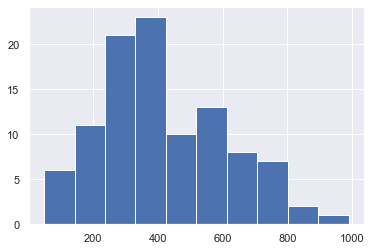

In [36]:
real['txt'].str.split().map(lambda x: len(x)).hist() 

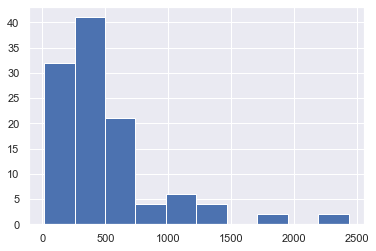

In [37]:
fake['txt'].str.split().map(lambda x: len(x)).hist()

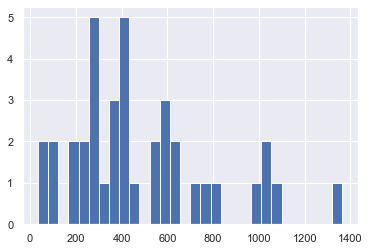

In [49]:
seq_len_fake_pred = [len(i.split()) for i in FNfake['txt']]
pd.Series(seq_len_fake_pred).hist(bins = 30)